## RNN sturcture
- Neural Network 모델에서 State 추가
- activation function으로 tanh 사용
- 각각 다른 state에서 weight들은 모두 공유한다는 것이 특징

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
tf.reset_default_graph()

samples = 1000

#sampling 간격 좁히기
times = np.array([1e-2*i for i in range(samples + 1)])
sin = np.sin(times[:-1])
sin_next = np.sin(times[1:])

time_step = 10
sin = np.reshape(sin, [-1, time_step, 1])#(100, 10, 1)
sin_next = np.reshape(sin_next, [-1, 1])

signal = tf.placeholder(tf.float32, [None, time_step, 1])
signal_next = tf.placeholder(tf.float32, [None, 1])

unstacked_signal = tf.unstack(signal, axis=1)
print('input: ')
for t in unstacked_signal:
    print(t)

state_size = 30
rnn_cell = tf.nn.rnn_cell.BasicRNNCell(state_size)
outputs, states = tf.nn.static_rnn(rnn_cell, unstacked_signal, dtype=tf.float32)

print('output: ')
for o in outputs:
    print(o)

print(state.shape)

states = tf.stack(outputs, axis=1)
reshaped_states = tf.reshape(states, [-1, state_size])
print(reshaped_states.shape)

output = tf.layers.dense(reshaped_states, 1, use_bias=False)

loss = tf.losses.mean_squared_error(signal_next, output)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

accuracy = tf.contrib.metrics.streaming_pearson_correlation(output, signal_next)



input: 
Tensor("unstack:0", shape=(?, 1), dtype=float32)
Tensor("unstack:1", shape=(?, 1), dtype=float32)
Tensor("unstack:2", shape=(?, 1), dtype=float32)
Tensor("unstack:3", shape=(?, 1), dtype=float32)
Tensor("unstack:4", shape=(?, 1), dtype=float32)
Tensor("unstack:5", shape=(?, 1), dtype=float32)
Tensor("unstack:6", shape=(?, 1), dtype=float32)
Tensor("unstack:7", shape=(?, 1), dtype=float32)
Tensor("unstack:8", shape=(?, 1), dtype=float32)
Tensor("unstack:9", shape=(?, 1), dtype=float32)
output: 
Tensor("rnn/rnn/basic_rnn_cell/Tanh:0", shape=(?, 30), dtype=float32)
Tensor("rnn/rnn/basic_rnn_cell/Tanh_1:0", shape=(?, 30), dtype=float32)
Tensor("rnn/rnn/basic_rnn_cell/Tanh_2:0", shape=(?, 30), dtype=float32)
Tensor("rnn/rnn/basic_rnn_cell/Tanh_3:0", shape=(?, 30), dtype=float32)
Tensor("rnn/rnn/basic_rnn_cell/Tanh_4:0", shape=(?, 30), dtype=float32)
Tensor("rnn/rnn/basic_rnn_cell/Tanh_5:0", shape=(?, 30), dtype=float32)
Tensor("rnn/rnn/basic_rnn_cell/Tanh_6:0", shape=(?, 30), dtype=

step: 0, loss: 0.8370292782783508, acc: nan
step: 200, loss: 0.013962462544441223, acc: 0.9478116035461426
step: 400, loss: 0.006642255000770092, acc: 0.9662107825279236
step: 600, loss: 0.0036622234620153904, acc: 0.9756607413291931
step: 800, loss: 0.002230729442089796, acc: 0.9809666872024536
step: 1000, loss: 0.001473165932111442, acc: 0.985363781452179
step: 1200, loss: 0.0010379527229815722, acc: 0.9879921674728394
step: 1400, loss: 0.000770767277572304, acc: 0.9885063767433167
step: 1600, loss: 0.0005983459413982928, acc: 0.9901557564735413
step: 1800, loss: 0.00048296188469976187, acc: 0.9909056425094604


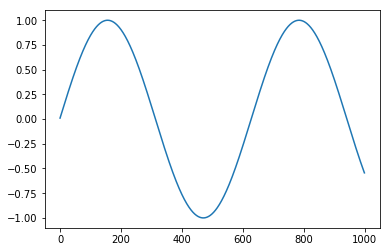

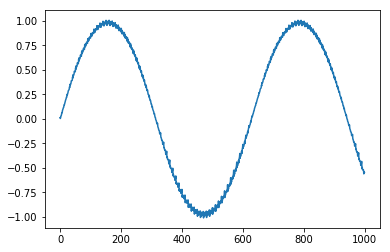

In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for i in range(2000):
        _, _loss, _acc = sess.run([train_op, loss, accuracy], feed_dict={signal: sin, signal_next: sin_next})
        
        if i%200 == 0:
            print('step: {}, loss: {}, acc: {}'.format(i, _loss, _acc[0]))
        
    _pred = sess.run(output, feed_dict={signal: sin})

    plt.figure(1)
    plt.plot(sin_next)
    plt.figure(2)
    plt.plot(_pred)
    plt.show()
    